In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1. Tiến hành phân tích về cấu trúc và tiền xử lý các bộ dataset

In [3]:
Annual_Surface_Temperature_Change = pd.read_csv("/content/drive/MyDrive/DS107/data/Annual_Surface_Temperature_Change.csv")
Annual_Surface_Temperature_Change.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,NaN,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [59]:
Annual_Surface_Temperature_Change.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,225.00000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,113.000000,0.13624,-0.011320,-0.005049,-0.058538,-0.206404,0.090031,-0.094084,-0.169022,0.133373,0.077689,-0.170213,-0.072453,0.196747,-0.139120,-0.019631,-0.206569,0.136338,0.058489,0.196391,0.209920,0.151649,0.150609,0.290991,0.066942,0.059564,0.127644,0.342018,0.413853,0.216320,0.466418,0.307622,0.218622,0.200627,0.563462,0.587289,0.260613,0.500476,0.906502,0.690444,0.622160,0.785920,0.871556,0.802956,0.736356,0.803707,0.837618,0.986191,0.761702,0.857956,1.050196,0.792187,0.862124,0.893951,1.070222,1.218982,1.362747,1.218169,1.232667,1.366098,1.462364,1.271876,1.308400
std,65.096083,0.37504,0.313182,0.353921,0.283803,0.263841,0.351435,0.315181,0.258850,0.289160,0.324327,0.225298,0.356299,0.317666,0.286518,0.386741,0.306478,0.238315,0.264413,0.371126,0.328826,0.300140,0.300507,0.515231,0.300237,0.341657,0.267869,0.460525,0.323921,0.463827,0.473219,0.309864,0.546962,0.393755,0.498770,0.454663,0.405805,0.486311,0.446572,0.474260,0.539498,0.505674,0.426329,0.458419,0.401072,0.411579,0.448922,0.569053,0.510197,0.428091,0.633031,0.416653,0.470598,0.364300,0.595173,0.516915,0.507294,0.473529,0.650431,0.558986,0.704322,0.560254,0.721674
min,1.000000,-0.69400,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,-0.870000,-1.796000,-0.987000,-0.982000,-1.093000,-0.959000,-0.599000,-0.871000,-1.239000,-0.760000,-0.909000,-0.682000,-2.062000,-1.455000,-1.193000,-0.765000,-1.652000,-0.504000,-1.537000,-0.739000,-0.700000,-1.344000,-1.355000,-0.425000,-0.330000,-0.787000,-0.429000,-0.607000,-0.273000,-0.718000,-0.186000,0.000000,-0.252000,-0.622000,-0.393000,-0.505000,-0.219000,-0.139000,-0.319000,-0.341000,-0.478000,-0.128000,0.000000,-0.092000,-0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.425000,-1.305000
25%,57.000000,-0.06700,-0.145000,-0.165000,-0.213000,-0.362000,-0.007000,-0.252000,-0.287000,0.000000,-0.021000,-0.303000,-0.155000,0.000000,-0.342000,-0.250000,-0.412000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.082000,-0.028000,0.000000,0.000000,0.129000,-0.018000,0.082000,0.000000,0.000000,0.000000,0.228000,0.305000,0.000000,0.097000,0.736000,0.384000,0.264000,0.459000,0.646000,0.552000,0.505000,0.542000,0.581000,0.650000,0.406000,0.635000,0.685000,0.538000,0.571000,0.707000,0.704000,0.970000,1.097000,0.967000,0.823000,1.078000,1.128000,0.952000,0.834000
50%,113.000000,0.00000,-0.024000,0.000000,0.000000,-0.193000,0.051000,-0.106000,-0.140000,0.149000,0.074000,-0.161000,-0.002000,0.168000,-0.130000,-0.040000,-0.212000,0.128000,0.067000,0.194000,0.237000,0.150000,0.154000,0.366000,0.000000,0.041000,0.103000,0.397000,0.433000,0.073000,0.396000,0.328000,0.259000,0.248000,0.466000,0.582000,0.276000,0.493000,0.987000,0.614000,0.508000,0.689000,0.827000,0.822000,0.703000,0.827000,0.810000,0.903000,0.667000,0.869000,1.091000,0.740000,0.780000,0.885000,0.960000,1.201000,1.411000,1.257000,1.101000,1.39600

In [4]:
Annual_Surface_Temperature_Change.drop_duplicates(inplace = True)
Annual_Surface_Temperature_Change.shape

(225, 72)

In [5]:
Annual_Surface_Temperature_Change.dtypes

ObjectId                 int64
Country                 object
ISO2                    object
ISO3                    object
Indicator               object
Unit                    object
Source                  object
CTS_Code                object
CTS_Name                object
CTS_Full_Descriptor     object
F1961                  float64
F1962                  float64
F1963                  float64
F1964                  float64
F1965                  float64
F1966                  float64
F1967                  float64
F1968                  float64
F1969                  float64
F1970                  float64
F1971                  float64
F1972                  float64
F1973                  float64
F1974                  float64
F1975                  float64
F1976                  float64
F1977                  float64
F1978                  float64
F1979                  float64
F1980                  float64
F1981                  float64
F1982                  float64
F1983   

In [6]:
Annual_Surface_Temperature_Change.isnull().sum()

ObjectId                0
Country                 0
ISO2                    2
ISO3                    0
Indicator               0
Unit                    0
Source                  0
CTS_Code                0
CTS_Name                0
CTS_Full_Descriptor     0
F1961                  37
F1962                  36
F1963                  37
F1964                  37
F1965                  37
F1966                  33
F1967                  34
F1968                  34
F1969                  35
F1970                  36
F1971                  34
F1972                  33
F1973                  32
F1974                  33
F1975                  37
F1976                  36
F1977                  40
F1978                  36
F1979                  36
F1980                  34
F1981                  34
F1982                  33
F1983                  35
F1984                  37
F1985                  37
F1986                  35
F1987                  35
F1988                  35
F1989       

In [7]:
def quality_categories(dfcolumns):
  print(dfcolumns.value_counts())
  print('----------')

for x in Annual_Surface_Temperature_Change.select_dtypes(include = ['object']).columns.drop(['Country', 'ISO2', 'ISO3']):
    quality_categories(Annual_Surface_Temperature_Change[x])

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    225
Name: count, dtype: int64
----------
Unit
Degree Celsius    225
Name: count, dtype: int64
----------
Source
Food and Agriculture Organization of the United Nations (FAO). 2022. FAOSTAT Climate Change, Climate Indicators, Temperature change. License: CC BY-NC-SA 3.0 IGO. Extracted from: https://www.fao.org/faostat/en/#data/ET. Accessed on 2023-03-28.    225
Name: count, dtype: int64
----------
CTS_Code
ECCS    225
Name: count, dtype: int64
----------
CTS_Name
Surface Temperature Change    225
Name: count, dtype: int64
----------
CTS_Full_Descriptor
Environment, Climate Change, Climate Indicators, Surface Temperature Change    225
Name: count, dtype: int64
----------


In [8]:
# Thay các giá trị null của nhiệt độ từng nằm bằng số 0, trừ cột ISO2 (Internaltional Standard Organization)
Annual_Surface_Temperature_Change.fillna(0, inplace = True)
Annual_Surface_Temperature_Change['ISO2'].replace(0, np.NaN, inplace = True)

### Change_in_Mean_Sea_Levels Dataset

In [61]:
Change_in_Mean_Sea_Levels = pd.read_csv("/content/drive/MyDrive/DS107/data/Change_in_Mean_Sea_Levels.csv")
Change_in_Mean_Sea_Levels.drop_duplicates(inplace = True)
Change_in_Mean_Sea_Levels.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [62]:
Change_in_Mean_Sea_Levels.describe()

,ObjectId,ISO2,Value
count,35604.000000,0.0,35604.000000
mean,17802.500000,NaN,25.983479
std,10278.133829,NaN,62.781917
min,1.000000,NaN,-401.850000
25%,8901.750000,NaN,-8.552500
50%,17802.500000,NaN,23.095000
75%,26703.250000,NaN,58.480000
max,35604.000000,NaN,504.950000


In [10]:
def datetimeStandard(ngay_chuoi):
  ngay_chuoi = ngay_chuoi[1:]
  ngay_dang_datetime = datetime.datetime.strptime(ngay_chuoi, "%m/%d/%Y")
  return ngay_dang_datetime.strftime("%d-%m-%Y")

Change_in_Mean_Sea_Levels['Date'] = Change_in_Mean_Sea_Levels['Date'].apply(lambda x: datetimeStandard(x))
Change_in_Mean_Sea_Levels['Date'] = pd.to_datetime(Change_in_Mean_Sea_Levels['Date'], errors='coerce')

<ipython-input-10-62a6bbf1982b>:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Change_in_Mean_Sea_Levels['Date'] = pd.to_datetime(Change_in_Mean_Sea_Levels['Date'], errors='coerce')


In [11]:
Change_in_Mean_Sea_Levels.dtypes

ObjectId                        int64
Country                        object
ISO2                          float64
ISO3                           object
Indicator                      object
Unit                           object
Source                         object
CTS_Code                       object
CTS_Name                       object
CTS_Full_Descriptor            object
Measure                        object
Date                   datetime64[ns]
Value                         float64
dtype: object

In [12]:
Change_in_Mean_Sea_Levels.ISO2.astype(object).dtypes

dtype('O')

In [13]:
Change_in_Mean_Sea_Levels.isnull().sum()

ObjectId                   0
Country                    0
ISO2                   35604
ISO3                       0
Indicator                  0
Unit                       0
Source                     0
CTS_Code                   0
CTS_Name                   0
CTS_Full_Descriptor        0
Measure                    0
Date                       0
Value                      0
dtype: int64

In [14]:
for x in Change_in_Mean_Sea_Levels.select_dtypes(include = ['object']).columns:
    quality_categories(Change_in_Mean_Sea_Levels[x])

Country
World    35604
Name: count, dtype: int64
----------
ISO3
WLD    35604
Name: count, dtype: int64
----------
Indicator
Change in mean sea level: Sea level: TOPEX.Poseidon    10997
Change in mean sea level: Sea level: Jason.1           10286
Change in mean sea level: Sea level: Jason.2            8098
Change in mean sea level: Sea level: Jason.3            6198
Change in mean sea level: Sea level: Trend                25
Name: count, dtype: int64
----------
Unit
Millimeters    35604
Name: count, dtype: int64
----------
Source
National Oceanic and Atmospheric Administration (NOAA). 2020. Sea Level Rise. Laboratory for Satellite Altimetry. https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries.php. Accessed on 2022-12-08.    35604
Name: count, dtype: int64
----------
CTS_Code
ECCL    35604
Name: count, dtype: int64
----------
CTS_Name
Change in Mean Sea Level    35604
Name: count, dtype: int64
----------
CTS_Full_Descriptor
Environment, Climate Change, Climate Ind

In [15]:
print(f'Value in range ( {min(Change_in_Mean_Sea_Levels.Value)} , {max(Change_in_Mean_Sea_Levels.Value)} )')

Value in range ( -401.85 , 504.95 )


In [16]:
Change_in_Mean_Sea_Levels.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,1992-12-17,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,1992-12-17,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,1992-12-17,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,1992-12-17,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,1992-12-17,3.27


### Climate_related_Disasters_Frequency Dataset

In [17]:
Climate_related_Disasters_Frequency = pd.read_csv("/content/drive/MyDrive/DS107/data/Climate-related_Disasters_Frequency.csv")
Climate_related_Disasters_Frequency.drop_duplicates(inplace = True)
Climate_related_Disasters_Frequency.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,1.0,NaN,NaN,4.0,8.0,2.0,8.0,7.0,7.0,1.0,3.0,2.0,2.0,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2.0,NaN,3.0,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [63]:
Climate_related_Disasters_Frequency.describe()

,ObjectId,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,485.500000,0.214433,0.230928,0.247423,0.323711,0.241237,0.268041,0.249485,0.331959,0.352577,0.288660,0.478351,0.367010,0.344330,0.470103,0.437113,0.435052,0.422680,0.478351,0.519588,0.614433,0.762887,0.707216,0.771134,0.651546,0.614433,0.839175,0.729897,0.785567,0.672165,0.647423,0.754639,0.604124,0.649485,0.610309,0.597938,0.729897,0.606186,0.649485,0.591753,0.744330,0.769072,0.806186,0.715464
std,280.159181,0.722196,0.788378,0.994629,0.946644,0.904952,0.992391,0.881893,1.007254,1.310991,1.135402,1.535290,1.612434,1.578687,1.653602,1.358634,1.280322,1.255206,1.655602,1.669284,1.628499,2.050816,1.930915,1.903555,1.687146,1.578950,2.048159,2.299377,1.908484,1.833567,1.806826,1.672828,1.868754,1.824279,2.042049,1.939007,2.163882,1.947071,1.845091,1.646942,1.758539,2.039920,2.404322,1.859755
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,485.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,727.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,970.000000,10.000000,12.000000,13.000000,10.000000,14.000000,15.000000,10.000000,12.000000,22.000000,17.000000,21.000000,35.000000,29.000000,28.000000,17.000000,17.000000,16.000000,33.000000,32.000000,22.000000,30.000000,27.000000,29.000000,22.000000,20.000000,28.000000,30.000000,23.000000,23.000000,24.000000,21.000000,30.000000,25.000000,34.000000,33.000000,31.000000,30.000000,26.000000,23.000000,20.000000,26.000000,43.000000,25.000000


In [18]:
Climate_related_Disasters_Frequency.dtypes

ObjectId                 int64
Country                 object
ISO2                    object
ISO3                    object
Indicator               object
Unit                    object
Source                  object
CTS_Code                object
CTS_Name                object
CTS_Full_Descriptor     object
F1980                  float64
F1981                  float64
F1982                  float64
F1983                  float64
F1984                  float64
F1985                  float64
F1986                  float64
F1987                  float64
F1988                  float64
F1989                  float64
F1990                  float64
F1991                  float64
F1992                  float64
F1993                  float64
F1994                  float64
F1995                  float64
F1996                  float64
F1997                  float64
F1998                  float64
F1999                  float64
F2000                  float64
F2001                  float64
F2002   

In [19]:
for x in Climate_related_Disasters_Frequency.select_dtypes(include = ['object']).columns:
    quality_categories(Change_in_Mean_Sea_Levels[x])

Country
World    35604
Name: count, dtype: int64
----------
Series([], Name: count, dtype: int64)
----------
ISO3
WLD    35604
Name: count, dtype: int64
----------
Indicator
Change in mean sea level: Sea level: TOPEX.Poseidon    10997
Change in mean sea level: Sea level: Jason.1           10286
Change in mean sea level: Sea level: Jason.2            8098
Change in mean sea level: Sea level: Jason.3            6198
Change in mean sea level: Sea level: Trend                25
Name: count, dtype: int64
----------
Unit
Millimeters    35604
Name: count, dtype: int64
----------
Source
National Oceanic and Atmospheric Administration (NOAA). 2020. Sea Level Rise. Laboratory for Satellite Altimetry. https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries.php. Accessed on 2022-12-08.    35604
Name: count, dtype: int64
----------
CTS_Code
ECCL    35604
Name: count, dtype: int64
----------
CTS_Name
Change in Mean Sea Level    35604
Name: count, dtype: int64
----------
CTS_Full_De

In [20]:
Climate_related_Disasters_Frequency.isnull().sum()

ObjectId                 0
Country                  0
ISO2                    26
ISO3                     0
Indicator                0
Unit                     0
Source                   0
CTS_Code                 0
CTS_Name                 0
CTS_Full_Descriptor      0
F1980                  831
F1981                  829
F1982                  845
F1983                  792
F1984                  838
F1985                  827
F1986                  839
F1987                  788
F1988                  788
F1989                  815
F1990                  772
F1991                  800
F1992                  814
F1993                  768
F1994                  768
F1995                  761
F1996                  762
F1997                  720
F1998                  715
F1999                  666
F2000                  667
F2001                  673
F2002                  635
F2003                  679
F2004                  696
F2005                  620
F2006                  719
F

In [21]:
for x in Climate_related_Disasters_Frequency.select_dtypes(include = ['float']).columns:
  Climate_related_Disasters_Frequency[x].fillna(0, inplace = True)

### Forest and Carbon

In [22]:
Forest_and_Carbon = pd.read_csv("/content/drive/MyDrive/DS107/data/Forest_and_Carbon.csv")
Forest_and_Carbon.drop_duplicates(inplace = True)
Forest_and_Carbon.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,1,Advanced Economies,NaN,AETMP,Carbon stocks in forests,Million tonnes,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,5.261866e+04,5.317770e+04,5.339357e+04,5.360944e+04,5.382531e+04,5.404118e+04,5.425705e+04,5.447292e+04,5.475543e+04,5.493122e+04,5.510702e+04,5.528282e+04,5.545862e+04,5.563441e+04,5.556263e+04,5.572758e+04,5.589254e+04,5.605750e+04,5.622245e+04,5.644555e+04,5.666865e+04,5.689175e+04,5.711485e+04,5.733795e+04,5.756817e+04,5.777785e+04,5.795976e+04,5.803505e+04,5.810255e+04
1,2,Advanced Economies,NaN,AETMP,Forest area,1000 HA,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,9.458406e+05,9.506288e+05,9.508836e+05,9.511385e+05,9.513934e+05,9.516483e+05,9.519032e+05,9.521581e+05,9.531670e+05,9.537221e+05,9.542773e+05,9.548324e+05,9.553876e+05,9.559428e+05,9.531395e+05,9.536493e+05,9.541591e+05,9.546688e+05,9.551786e+05,9.563385e+05,9.574984e+05,9.586583e+05,9.598182e+05,9.609781e+05,9.620138e+05,9.618451e+05,9.619637e+05,9.621006e+05,9.622522e+05
2,3,Advanced Economies,NaN,AETMP,Index of carbon stocks in forests,Index,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,1.000000e+02,1.010624e+02,1.014727e+02,1.018829e+02,1.022932e+02,1.027034e+02,1.031137e+02,1.035239e+02,1.040609e+02,1.043950e+02,1.047290e+02,1.050631e+02,1.053972e+02,1.057313e+02,1.055949e+02,1.059084e+02,1.062219e+02,1.065354e+02,1.068489e+02,1.072729e+02,1.076969e+02,1.081209e+02,1.085449e+02,1.089688e+02,1.094064e+02,1.098049e+02,1.101506e+02,1.102937e+02,1.104220e+02
3,4,Advanced Economies,NaN,AETMP,Index of forest extent,Index,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,1.000000e+02,1.005062e+02,1.005332e+02,1.005601e+02,1.005871e+02,1.006140e+02,1.006410e+02,1.006679e+02,1.007746e+02,1.008333e+02,1.008920e+02,1.009507e+02,1.010094e+02,1.010681e+02,1.007717e+02,1.008256e+02,1.008795e+02,1.009334e+02,1.009873e+02,1.011099e+02,1.012325e+02,1.013552e+02,1.014778e+02,1.016004e+02,1.017099e+02,1.016921e+02,1.017046e+02,1.017191e+02,1.017351e+02
4,5,Advanced Economies,NaN,AETMP,Land area,1000 HA,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,2.986569e+06,2.999105e+06,2.999104e+06,2.999103e+06,2.999091e+06,2.999087e+06,2.999084e+06,2.999080e+06,3.002819e+06,3.002842e+06,3.002844e+06,3.002872e+06,3.002838e+06,3.002839e+06,2.992589e+06,2.992586e+06,2.991120e+06,2.991121e+06,2.991130e+06,2.991126e+06,2.991136e+06,2.991273e+06,2.991271e+06,2.991273e+06,2.992294e+06,2.992224e+06,2.992281e+06,2.992286e+06,2.992206e+06


In [64]:
Forest_and_Carbon.describe()

,ObjectId,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
count,1353.000000,1353.0,1353.0,1353.0,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03
mean,677.000000,0.0,0.0,0.0,6.147286e+04,6.169286e+04,6.166406e+04,6.163804e+04,6.161296e+04,6.160859e+04,6.157618e+04,6.155380e+04,6.156342e+04,6.154812e+04,6.153251e+04,6.151986e+04,6.154834e+04,6.153429e+04,6.150803e+04,6.149309e+04,6.147124e+04,6.145604e+04,6.144207e+04,6.143094e+04,6.184874e+04,6.183732e+04,6.182613e+04,6.181600e+04,6.181285e+04,6.178887e+04,6.177567e+04,6.176079e+04,6.174632e+04
std,390.721768,0.0,0.0,0.0,5.572969e+05,5.593477e+05,5.591997e+05,5.590844e+05,5.589811e+05,5.591226e+05,5.589335e+05,5.588640e+05,5.590975e+05,5.590283e+05,5.589566e+05,5.589182e+05,5.593469e+05,5.592933e+05,5.593212e+05,5.592581e+05,5.591313e+05,5.590651e+05,5.590129e+05,5.589624e+05,5.634262e+05,5.633708e+05,5.633201e+05,5.632823e+05,5.632816e+05,5.631780e+05,5.631300e+05,5.630762e+05,5.630239e+05
min,1.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,339.000000,0.0,0.0,0.0,4.982200e+01,5.068406e+01,4.997000e+01,5.093506e+01,5.090010e+01,5.057439e+01,5.093506e+01,5.093506e+01,5.086439e+01,5.093506e+01,5.093506e+01,5.093506e+01,5.119166e+01,5.096781e+01,4.967000e+01,4.966347e+01,4.937606e+01,4.919002e+01,4.900398e+01,4.763208e+01,4.717267e+01,4.694612e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.666760e+01,4.671900e+01
50%,677.000000,0.0,0.0,0.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,1015.000000,0.0,0.0,0.0,1.385512e+03,1.380253e+03,1.374923e+03,1.369593e+03,1.364264e+03,1.359528e+03,1.359528e+03,1.359528e+03,1.368180e+03,1.396138e+03,1.424095e+03,1.438927e+03,1.432136e+03,1.425345e+03,1.303511e+03,1.296938e+03,1.290786e+03,1.289798e+03,1.289954e+03,1.297214e+03,1.304473e+03,1.311733e+03,1.318993e+03,1.332830e+03,1.331848e+03,1.337724e+03,1.343320e+03,1.345000e+03,1.345000e+03
max,1353.000000,0.0,0.0,0.0,1.299094e+07,1.299057e+07,1.298936e+07,1.298906e+07,1.298901e+07,1.299595e+07,1.299334e+07,1.299402e+07,1.299993e+07,1.299981e+07,1.299959e+07,1.300030e+07,1.301496e+07,1.301523e+07,1.301501e+07,1.301499e+07,1.301340e+07,1.301325e+07,1.301348e+07,1.301345e+07,1.302585e+07,1.302568e+07,1.302561e+07,1.302598e+07,1.302696e+07,1.302623e+07,1.302630e+07,1.302629e+07,1.302624e+07


In [23]:
Forest_and_Carbon.dtypes

ObjectId                 int64
Country                 object
ISO2                    object
ISO3                    object
Indicator               object
Unit                    object
Source                  object
CTS_Code               float64
CTS_Name               float64
CTS_Full_Descriptor    float64
F1992                  float64
F1993                  float64
F1994                  float64
F1995                  float64
F1996                  float64
F1997                  float64
F1998                  float64
F1999                  float64
F2000                  float64
F2001                  float64
F2002                  float64
F2003                  float64
F2004                  float64
F2005                  float64
F2006                  float64
F2007                  float64
F2008                  float64
F2009                  float64
F2010                  float64
F2011                  float64
F2012                  float64
F2013                  float64
F2014   

In [24]:
Forest_and_Carbon.isnull().sum()

ObjectId                  0
Country                   0
ISO2                     64
ISO3                      0
Indicator                 0
Unit                      0
Source                    0
CTS_Code               1353
CTS_Name               1353
CTS_Full_Descriptor    1353
F1992                     0
F1993                     0
F1994                     0
F1995                     0
F1996                     0
F1997                     0
F1998                     0
F1999                     0
F2000                     0
F2001                     0
F2002                     0
F2003                     0
F2004                     0
F2005                     0
F2006                     6
F2007                     6
F2008                     6
F2009                     6
F2010                     6
F2011                    12
F2012                    12
F2013                    12
F2014                    12
F2015                    12
F2016                    12
F2017               

In [25]:
for x in Forest_and_Carbon.select_dtypes(include = ['float']).columns:
  Forest_and_Carbon[x].fillna(0, inplace = True)

### 2. Thu thập số liệu của nhiệt độ, nồng độ CO2, diện tích rừng, và tần suất thiên tai theo quốc gia.

In [26]:
df2_temp = Annual_Surface_Temperature_Change[Annual_Surface_Temperature_Change.columns.drop(['ObjectId','ISO2','ISO3',	'Indicator','Unit',	'Source', 'CTS_Code',	'CTS_Name',	'CTS_Full_Descriptor'])].groupby('Country').sum()
#df2_temp['avg_temperature'] = df2_temp.drop('Country', axis = 1).sum(axis = 0)
df2_temp = df2_temp.reset_index()
df2_temp.head()

,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,0.000,0.000,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,0.000,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


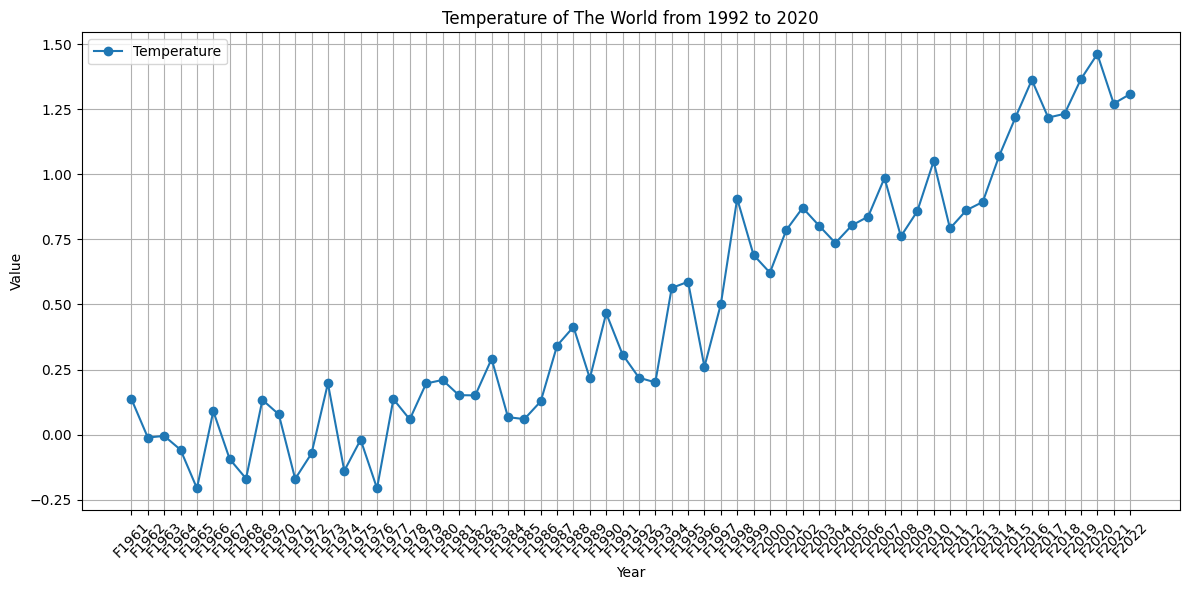

In [52]:
def world_plot(df, name_plot):
  plt.figure(figsize=(12, 6))
  plt.plot(df, label= name_plot, marker='o')
  plt.xlabel('Year')
  plt.ylabel('Value')
  plt.title(f'{name_plot} of The World from 1992 to 2020')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

world_plot(df2_temp.select_dtypes(include=[float]).mean(axis = 0).T, 'Temperature')

In [28]:
df2_Climate_related_Disasters_Frequency = Climate_related_Disasters_Frequency.drop(['ObjectId','ISO2','ISO3',	'Indicator','Unit',	'Source', 'CTS_Code',	'CTS_Name',	'CTS_Full_Descriptor'], axis = 1).groupby('Country').sum()
df2_Climate_related_Disasters_Frequency = df2_Climate_related_Disasters_Frequency.reset_index()
df2_Climate_related_Disasters_Frequency.head()

,Country,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,8.0,4.0,6.0,0.0,6.0,2.0,6.0,4.0,4.0,2.0,4.0,10.0,16.0,4.0,20.0,24.0,14.0,6.0,8.0,8.0,8.0,20.0,10.0,6.0,10.0,8.0,10.0,10.0,14.0,14.0,8.0,12.0
1,Albania,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,6.0,2.0,4.0,2.0,0.0,0.0,2.0,0.0
2,Algeria,0.0,4.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,6.0,0.0,2.0,2.0,0.0,2.0,10.0,2.0,6.0,10.0,4.0,6.0,2.0,14.0,2.0,4.0,0.0,2.0,4.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,0.0,6.0,2.0
3,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,6.0,2.0,4.0,8.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,2.0,0.0,6.0,8.0,4.0,2.0,6.0,6.0,4.0,0.0


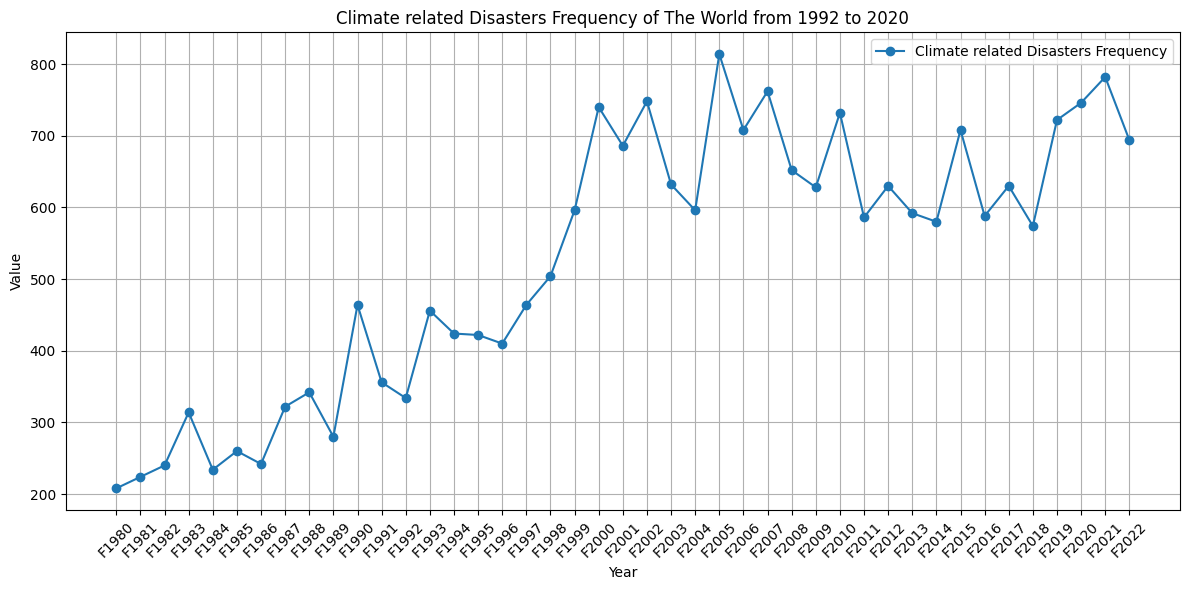

In [53]:
world_plot(df2_Climate_related_Disasters_Frequency.select_dtypes(include=[float]).sum(axis = 0).T, 'Climate related Disasters Frequency')

In [30]:
df2_Carbon = Forest_and_Carbon[Forest_and_Carbon['Indicator'] == 'Carbon stocks in forests'].drop(['ObjectId','ISO2','ISO3',	'Indicator','Unit',	'Source', 'CTS_Code',	'CTS_Name',	'CTS_Full_Descriptor'], axis = 1).groupby('Country').sum()
#df2_Carbon['avg_Carbon'] = df2_Carbon.select_dtypes(include=[float]).mean(axis = 1)
df2_Carbon = df2_Carbon.reset_index()
df2_Carbon.head()

,Country,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,Advanced Economies,52618.6601,53177.6998,53393.5688,53609.4382,53825.3073,54041.1769,54257.0465,54472.9153,54755.4274,54931.2242,55107.0214,55282.8181,55458.6155,55634.4123,55562.6288,55727.5842,55892.5399,56057.4956,56222.4507,56445.5501,56668.6489,56891.7480,57114.8466,57337.9461,57568.1744,57777.8499,57959.7625,58035.0513,58102.5521
1,Africa,55811.7552,57006.7484,56766.9408,56527.1333,56287.3259,56047.5177,55807.7105,55567.9025,55328.0951,55079.0878,54830.0808,54581.0739,54332.0665,54083.0598,53834.0528,53585.0458,53336.0385,53087.0315,52838.0245,52532.0036,52890.5790,52578.6891,52266.7998,51954.9100,51666.6077,51265.4387,50960.3994,50654.3608,50343.8299
2,Algeria,30.8266,30.6701,30.5136,30.3571,30.2006,30.0441,29.8876,29.7312,29.5747,30.2307,30.8868,31.5428,32.1989,32.8549,33.5109,34.1670,34.8230,35.4791,36.1351,36.3057,36.4763,36.6468,36.8174,36.9880,36.8706,36.6061,36.1682,36.5114,36.7192
3,American Samoa,1.1817,1.1956,1.2095,1.2234,1.2373,1.2512,1.2651,1.2790,1.2929,1.3036,1.3144,1.3251,1.3359,1.3466,1.3573,1.3681,1.3788,1.3896,1.4003,1.4101,1.4199,1.4297,1.4395,1.4493,1.4611,1.4727,1.4847,1.4938,1.5054
4,Americas,143539.8246,143225.9246,142912.0242,142598.1243,142284.2241,141970.3242,141656.4242,141342.5240,141028.6240,140665.6924,140302.7613,139939.8301,139576.8985,139213.9670,138851.0357,138488.1041,138125.1730,137762.2417,137399.3103,137308.0556,137216.9093,137125.7636,137034.6174,136943.4716,136837.4255,136673.0453,136627.0998,136434.7939,136258.1466


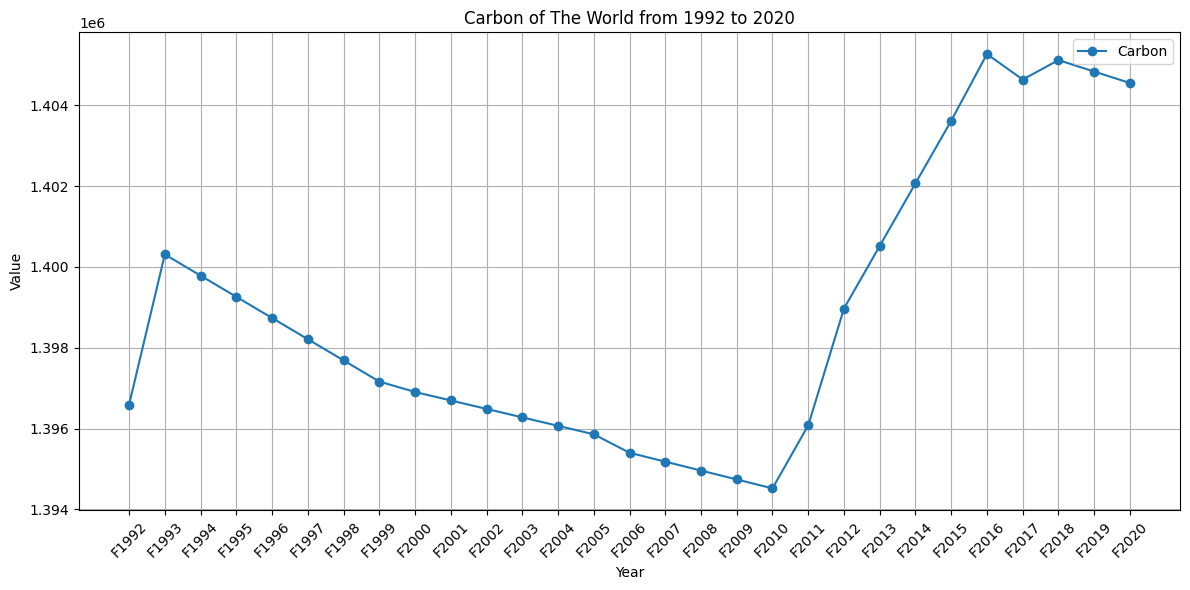

In [54]:
world_plot(df2_Carbon.select_dtypes(include=[float]).sum(axis = 0).T, 'Carbon')

In [32]:
df2_area = Forest_and_Carbon[Forest_and_Carbon['Indicator'] == 'Forest area'].drop(['ObjectId','ISO2','ISO3',	'Indicator','Unit',	'Source', 'CTS_Code',	'CTS_Name',	'CTS_Full_Descriptor'], axis = 1).groupby('Country').sum()
#df2_area['avg_area'] = df2_area.select_dtypes(include=[float]).mean(axis = 1)
df2_area = df2_area.reset_index()
df2_area.head()

,Country,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,Advanced Economies,945840.6089,950628.7545,950883.6399,951138.5255,951393.4111,951648.2965,951903.1821,952158.0675,953166.9531,953722.1170,954277.2811,954832.4451,955387.6092,955942.7732,953139.5372,953649.3013,954159.0653,954668.8294,955178.5934,956338.5036,957498.4138,958658.3240,959818.2342,960978.1444,962013.8455,961845.1200,961963.710,962100.59,962252.19
1,"Afghanistan, Islamic Rep. of",1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.440,1208.44,1208.44
2,Africa,685614.0711,702769.4832,699668.6553,696567.8275,693466.9996,690366.1717,687265.3438,684164.5159,681063.6880,677834.8392,674605.9904,671377.1416,668148.2928,664919.4440,661690.5952,658461.7464,655232.8976,652004.0488,648775.2000,645042.8380,668200.1500,664293.5400,660386.9300,656480.3200,652479.3843,648546.9900,644616.828,640606.55,636636.97
3,Albania,784.9000,782.9500,781.0000,779.0500,777.1000,775.1500,773.2000,771.2500,769.3000,770.5770,771.8540,773.1310,774.4080,775.6850,776.9620,778.2390,779.5160,780.7930,782.0700,783.4935,784.9170,786.3405,787.7640,789.1875,789.1800,788.9025,788.900,788.90,788.90
4,Algeria,1649.4000,1640.6000,1631.8000,1623.0000,1614.2000,1605.4000,1596.6000,1587.8000,1579.0000,1612.9000,1646.8000,1680.7000,1714.6000,1748.5000,1782.4000,1816.3000,1850.2000,1884.1000,1918.0000,1925.6000,1933.2000,1940.8000,1948.4000,1956.0000,1956.0000,1943.0000,1930.000,1939.00,1949.00


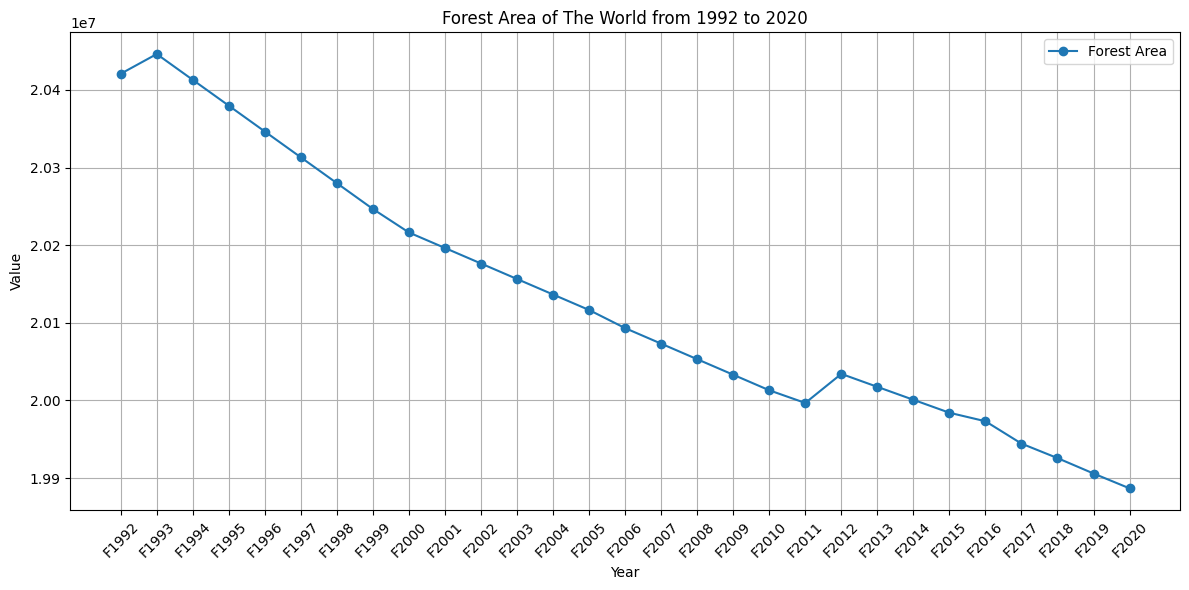

In [55]:
world_plot(df2_area.select_dtypes(include=[float]).sum(axis = 0).T, 'Forest Area')

In [34]:
unique_countries = list(set(df2_area['Country'].unique()) | set(df2_Carbon['Country'].unique()) | set(df2_temp['Country'].unique()) | set(df2_Climate_related_Disasters_Frequency['Country'].unique()))
df_unique_countries = pd.DataFrame({'Country': unique_countries}).sort_values(by='Country')

### 3. Tiến hành phân tích sự ảnh hưởng của diện tích rừng lên nhiệt độ, nồng độ CO2, và tuần suất thiên tai theo các khu vực Đông Á và Đông Nam Á

In [35]:
East_Asian = {'China, P.R.: Mainland', 'China, P.R.: Hong Kong', 'China, P.R.: Macao', 'Taiwan Province of China', 'Japan', 'Mongolia', "Korea, Dem. People's Rep. of", "Korea, Rep. of', 'Kuwait"}
Temp_east_asian = df2_temp[df2_temp['Country'].isin(East_Asian)]
Carbon_east_asian = df2_Carbon[df2_Carbon['Country'].isin(East_Asian)]
Forest_Area_east_asian = df2_area[df2_area['Country'].isin(East_Asian)]
Disasters_Frequency_east_asian = df2_Climate_related_Disasters_Frequency[df2_Climate_related_Disasters_Frequency['Country'].isin(East_Asian)]

 Dữ liệu nhiệt độ được ghi từ năm 1961 - 2022 \
 Dữ liệu diện tích rừng được ghi từ năm 1992 - 2020 \
 Dữ liệu Carbon được ghi từ năm 1992 - 2020 \
 Dữ liệu về thiên tai được ghi lại từ năm 1980 - 2022

 ==> Để so sánh sự ảnh hưởng thì lấy giai đoạn từ năm 1992 - 2020


In [56]:
def plot(Name_table, name_plot):
  plt.figure(figsize=(15, 4))
  plt.plot(Name_table.T, marker='o')
  plt.xlabel('Year')
  plt.ylabel('Value')
  plt.title(name_plot)
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

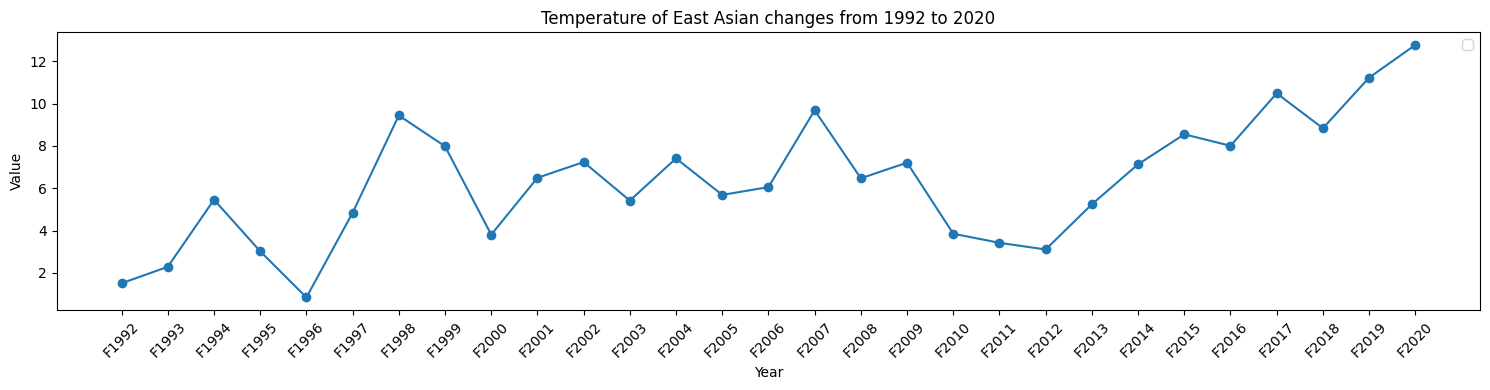

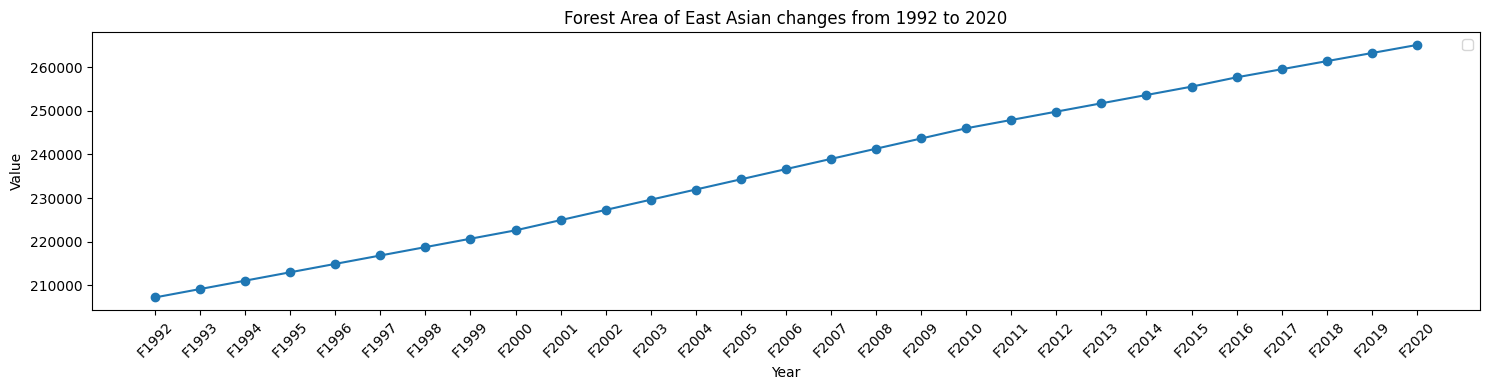

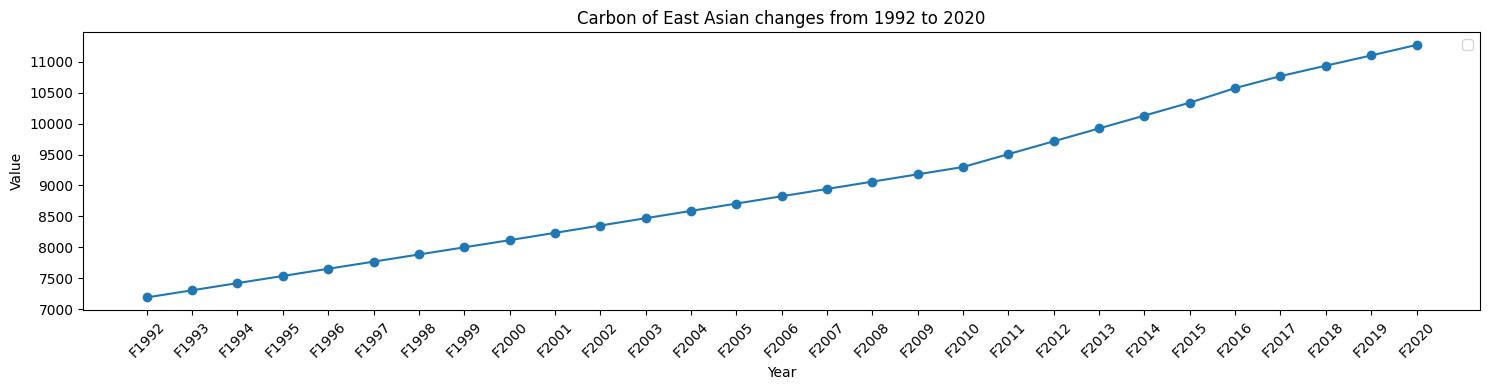

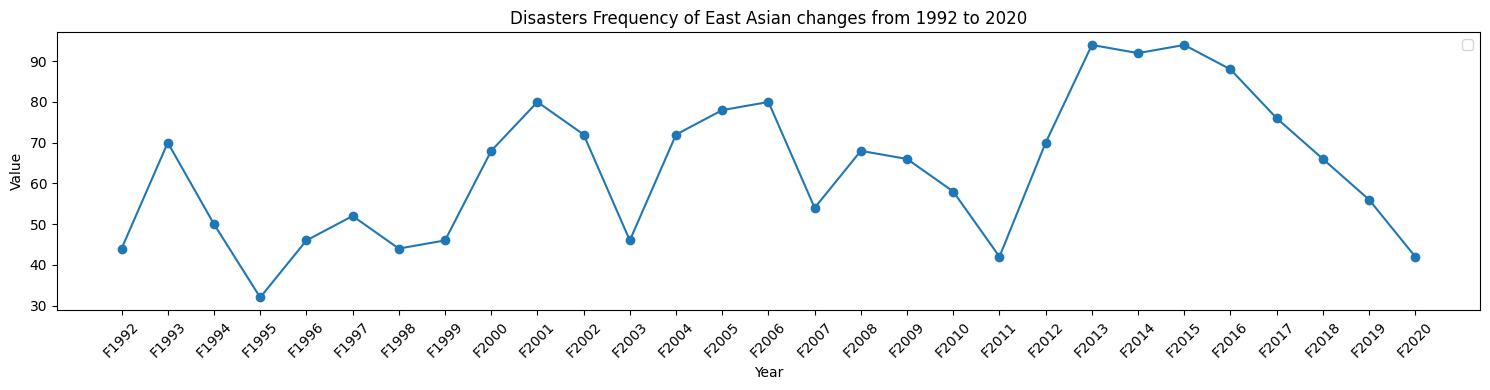

In [58]:
plot(Temp_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Temperature of East Asian changes from 1992 to 2020')
plot(Forest_Area_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Forest Area of East Asian changes from 1992 to 2020')
plot(Carbon_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Carbon of East Asian changes from 1992 to 2020')
plot(Disasters_Frequency_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Disasters Frequency of East Asian changes from 1992 to 2020')


Ở Đông Á
*   Nhiệt độ giữa các năm tăng giảm khác nhau. Nhưng nhìn chung, đến năm 2020 nhiệt độ đã tăng hơn rất nhiều so với năm 1992.
*   Tầng suất xuất hiện thiên tai của các nước Đông á tăng đỉnh điểm vào khoảng 2012-2016 rồi giảm chạm đáy đến năm 2020.
*   Từ 1992 - 2020, diện tích rừng và khí thải CO2 đều tăng. Rõ ràng, diện tích rừng càng lớn thì khí thải CO2 sẽ giảm đi nhưng ngược lại là vì do trong khoảng thời gian này các nước Đông Á tập trung phát triển kinh tế nên khí thải CO2 từ công nghiệp tăng lên.






#### Phân tích tương quan Pearson, đánh giá sự tương quan giữa các thuộc tính nhiệt độ, carbon dioxide, tần suất thiên tai với diện tích rừng ở Đông Á

In [37]:
print("Mức độ tương quan giữa nhiệt độ và diện tích rừng: ", np.corrcoef(Temp_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa Carbon dioxide và diện tích rừng: ", np.corrcoef(Carbon_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa tần suất thiên tai và diện tích rừng: ", np.corrcoef(Disasters_Frequency_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_east_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])

Mức độ tương quan giữa nhiệt độ và diện tích rừng:  0.6101622703121097
Mức độ tương quan giữa Carbon dioxide và diện tích rừng:  0.9884715509786246
Mức độ tương quan giữa tần suất thiên tai và diện tích rừng:  0.4302178330140335


## Khu vực Đông Nam á

In [38]:
Southeast_Asia = {'Brunei Darussalam', 'Cambodia', 'Timor-Leste, Dem. Rep. of', 'Indonesian', "Lao People's Dem. Rep.", 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'}

Temp_Southeast_asian = df2_temp[df2_temp['Country'].isin(Southeast_Asia)]
Carbon_Southeast_asian = df2_Carbon[df2_Carbon['Country'].isin(Southeast_Asia)]
Forest_Area_Southeast_asian = df2_area[df2_area['Country'].isin(Southeast_Asia)]
Disasters_Frequency_Southeast_asian = df2_Climate_related_Disasters_Frequency[df2_Climate_related_Disasters_Frequency['Country'].isin(Southeast_Asia)]

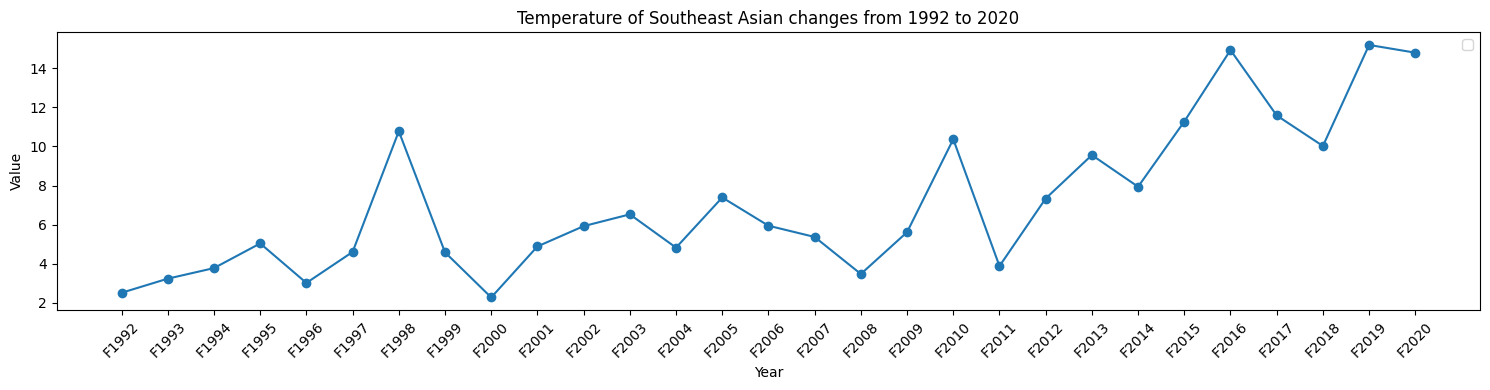

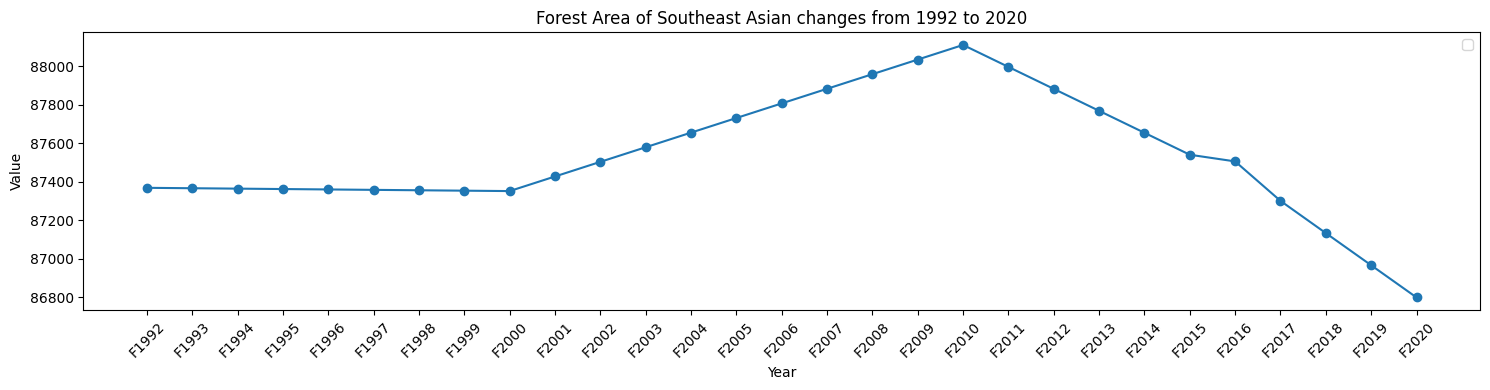

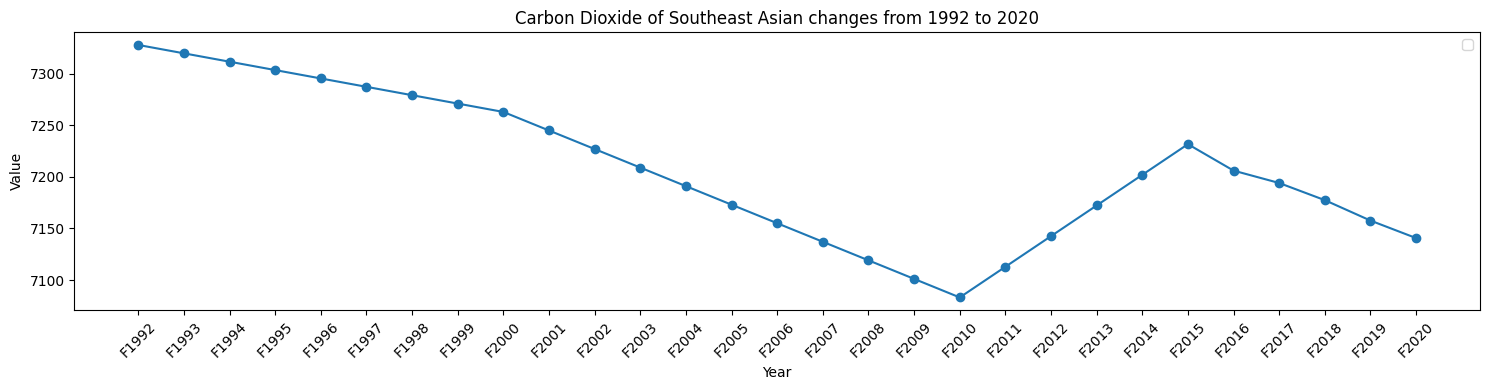

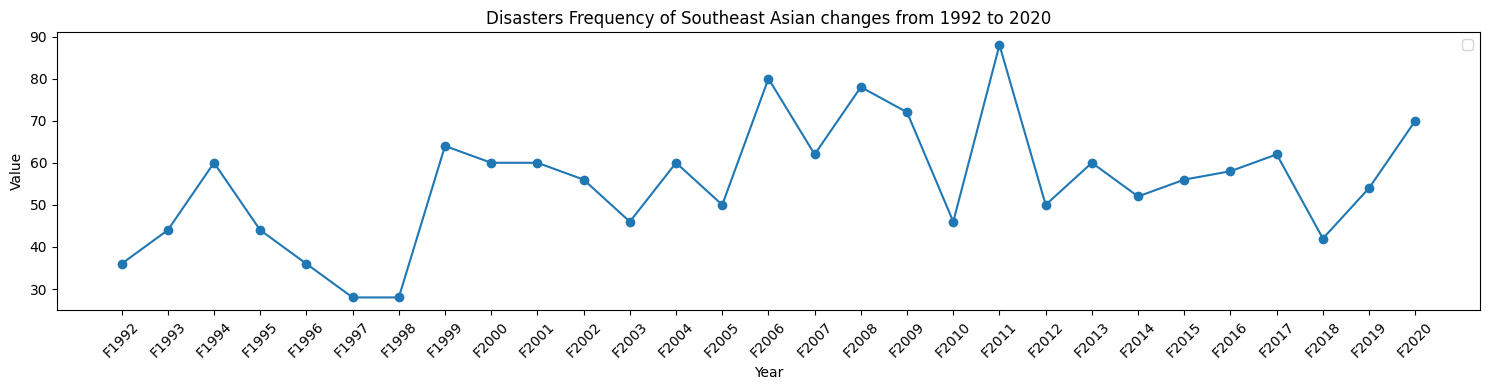

In [57]:
plot(Temp_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Temperature of Southeast Asian changes from 1992 to 2020')
plot(Forest_Area_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Forest Area of Southeast Asian changes from 1992 to 2020')
plot(Carbon_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Carbon Dioxide of Southeast Asian changes from 1992 to 2020')
plot(Disasters_Frequency_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0).T, 'Disasters Frequency of Southeast Asian changes from 1992 to 2020')

Ở Đông Nam Á


*   Nhiệt độ, diện tích rừng, khí CO2, thiên tai đều có xu hướng tăng.
*   So với các nước Đông Á, thì xu hướng các yếu tố khá giống nhưng chỉ khác về thiên tai của các nước Đông Nam Á có xu hướng tăng.



#### Phân tích tương quan Pearson, đánh giá sự tương quan giữa các thuộc tính nhiệt độ, carbon dioxide, tần suất thiên tai với diện tích rừng ở Đông Nam Á

In [40]:
print("Mức độ tương quan giữa nhiệt độ và diện tích rừng: ", np.corrcoef(Temp_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa Carbon dioxide và diện tích rừng: ", np.corrcoef(Carbon_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa tần suất thiên tai và diện tích rừng: ", np.corrcoef(Disasters_Frequency_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0), Forest_Area_Southeast_asian.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])

Mức độ tương quan giữa nhiệt độ và diện tích rừng:  -0.3121822396232287
Mức độ tương quan giữa Carbon dioxide và diện tích rừng:  -0.5308230003803437
Mức độ tương quan giữa tần suất thiên tai và diện tích rừng:  0.3497080476522786


### 4. Tiến hành phân tích tính chất của khí hậu của hai khu vực: Đông Á và Đông Nam Á.

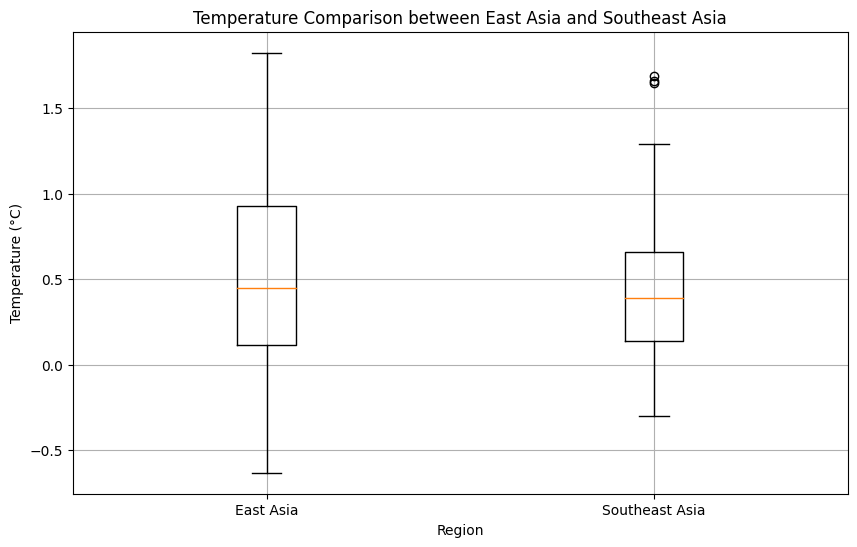

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot([Temp_east_asian.drop('Country', axis = 1).mean(axis = 0), Temp_Southeast_asian.drop('Country', axis = 1).mean(axis = 0)], labels=['East Asia', 'Southeast Asia'])
plt.title('Temperature Comparison between East Asia and Southeast Asia')
plt.xlabel('Region')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Nhiệt độ ở các nước Đông Á có khoảng nhiệt độ rộng hơn các nước Đông Nam Á. Tuy nhiên, cần kiểm định có sự khác biệt quá lớn về nhiệt độ của hai khu vực hay không?

In [42]:
anova_temp = f_oneway(Temp_east_asian.drop('Country', axis = 1).mean(axis = 0).T, Temp_Southeast_asian.drop('Country', axis = 1).mean(axis = 0).T)
print("ANOVA Result for Temperature:")
print("F-statistic:", anova_temp.statistic)
print("p-value:", anova_temp.pvalue)

ANOVA Result for Temperature:
F-statistic: 0.3350454892624368
p-value: 0.5637702435216893


Ta thấy p-value > 0.05 => không có sự khác biệt quá lớn giữa nhiệt độ của hai khu vực: Đông Á và Đông Nam Á.

### 5. Tiến hành phân tích ảnh hưởng của diện tích rừng lên nhiệt độ, nồng độ CO2 và tần suất xuất hiện thiên tai ở Việt Nam.

In [43]:
temp_VN = df2_temp[df2_temp['Country'] == 'Vietnam']
Carbon_VN = df2_Carbon[df2_Carbon['Country'] == 'Vietnam']
forest_VN = df2_area[df2_area['Country'] == 'Vietnam']
Disasters_Frequency_VN = df2_Climate_related_Disasters_Frequency[df2_Climate_related_Disasters_Frequency['Country'] == 'Vietnam']

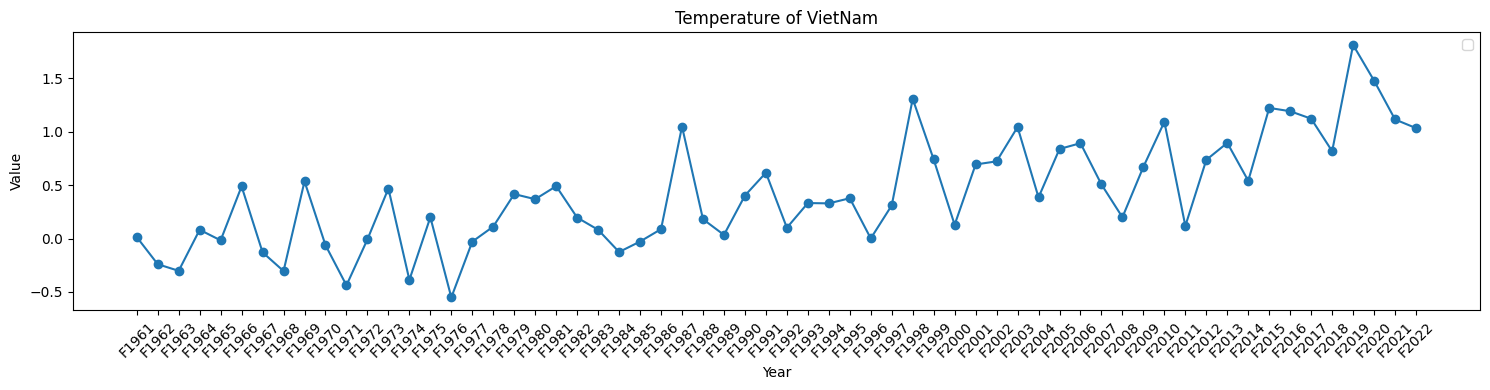

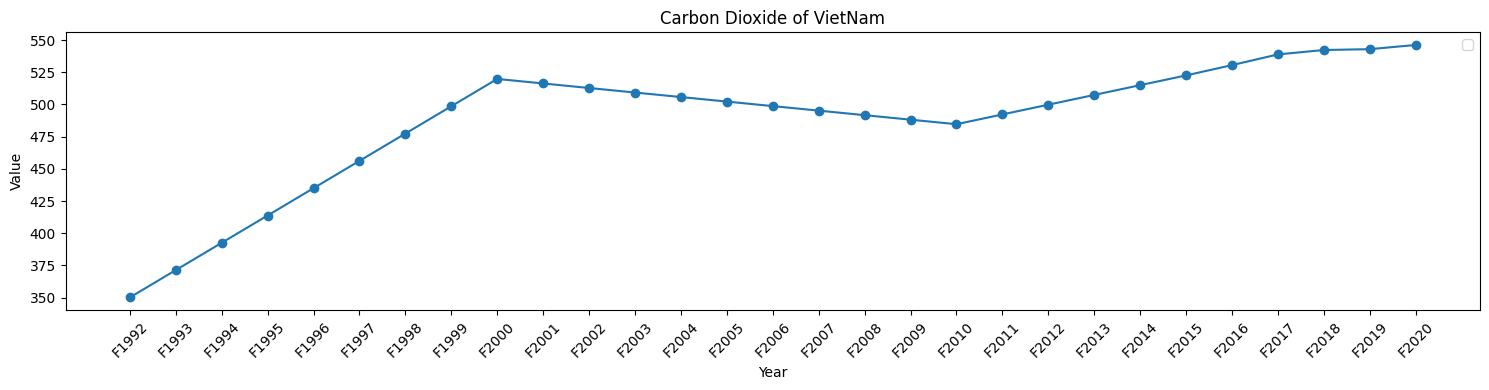

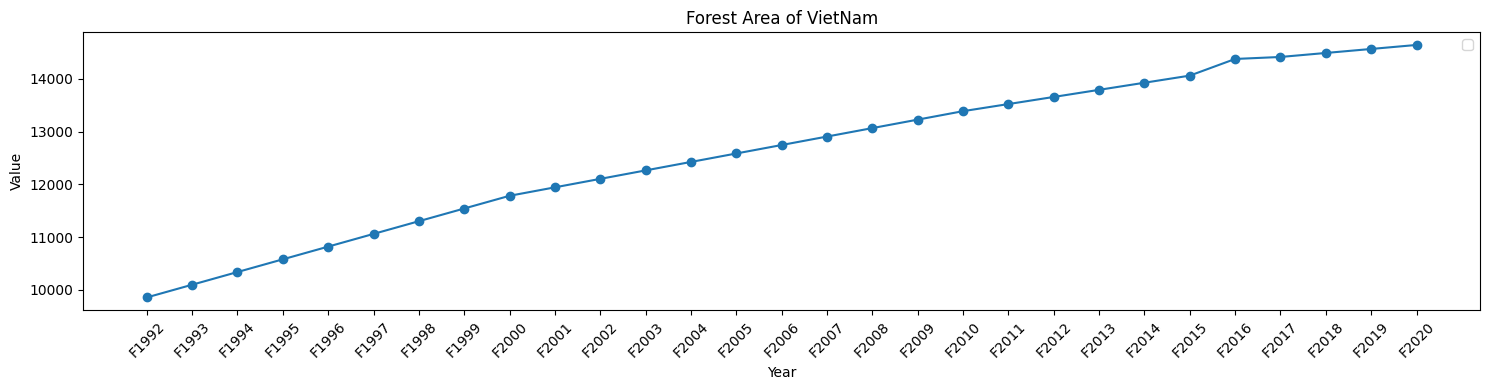

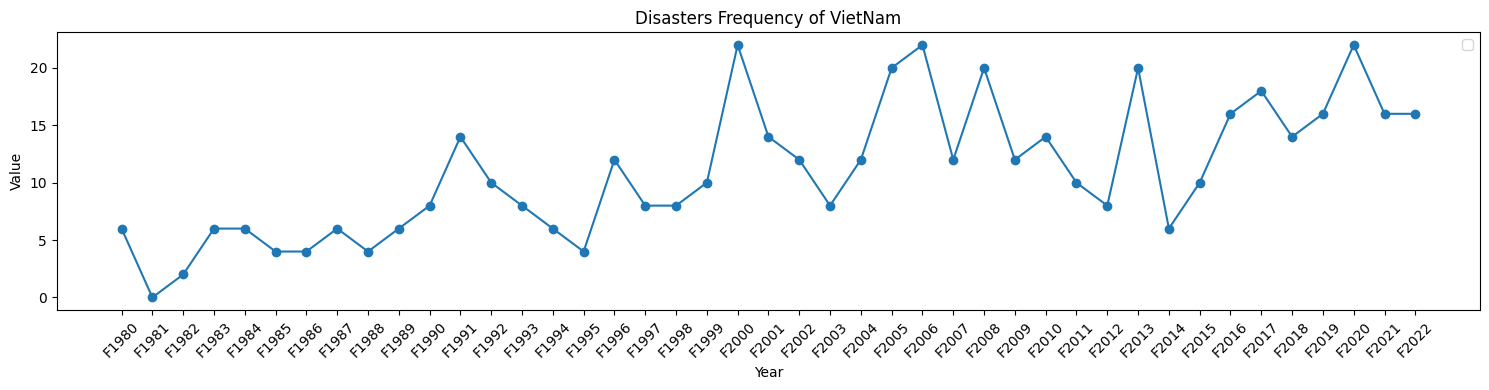

In [45]:
plot(temp_VN.drop('Country', axis = 1), 'Temperature of VietNam')
plot(Carbon_VN.drop('Country', axis = 1), 'Carbon Dioxide of VietNam')
plot(forest_VN.drop('Country', axis = 1), 'Forest Area of VietNam')
plot(Disasters_Frequency_VN.drop('Country', axis = 1), 'Disasters Frequency of VietNam')

In [46]:
print("Mức độ tương quan giữa nhiệt độ và diện tích rừng: ", np.corrcoef(forest_VN.loc[:, 'F1992':'F2020'].sum(axis = 0),temp_VN.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa Carbon dioxide và diện tích rừng: ", np.corrcoef(forest_VN.loc[:, 'F1992':'F2020'].sum(axis = 0), Carbon_VN.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])
print("Mức độ tương quan giữa tần suất thiên tai và diện tích rừng: ", np.corrcoef(forest_VN.loc[:, 'F1992':'F2020'].sum(axis = 0), Disasters_Frequency_VN.loc[:, 'F1992':'F2020'].sum(axis = 0))[0, 1])

Mức độ tương quan giữa nhiệt độ và diện tích rừng:  0.6175697608017235
Mức độ tương quan giữa Carbon dioxide và diện tích rừng:  0.8464614152181905
Mức độ tương quan giữa tần suất thiên tai và diện tích rừng:  0.4629367283147258


### 6. Xây dựng mô hình Logistic Regression dự đoán tỷ lệ xuất hiện hạn hán và lũ lụt ở Việt Nam trong năm 2023.

In [47]:
df_1 = temp_VN.loc[:, 'F1992':'F2020'].T.reset_index()
df_1.columns = ['Year', 'Carbon']

df_2 = forest_VN.loc[:, 'F1992':'F2020'].T.reset_index()
df_2.columns = ['Year', 'Forest']

df_3 = Disasters_Frequency_VN.loc[:, 'F1992':'F2020'].T.reset_index()
df_3.columns = ['Year', 'Disasters_Frequency']

df_4 = Carbon_VN.loc[:, 'F1992':'F2020'].T.reset_index()
df_4.columns = ['Year', 'Carbon']

In [48]:
df = pd.concat([df_1, df_2['Forest'], df_4['Carbon'], df_3['Disasters_Frequency']], axis=1)
df.head()

,Year,Carbon,Forest,Carbon,Disasters_Frequency
0,F1992,0.101,9857.588,350.1345,10.0
1,F1993,0.332,10098.402,371.3423,8.0
2,F1994,0.329,10339.216,392.5501,6.0
3,F1995,0.377,10580.030,413.7578,4.0
4,F1996,0.001,10820.844,434.9656,12.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['Disasters_Frequency','Year'], axis=1)
y = df['Disasters_Frequency']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print('Mean Squared Error', mse)

Mean Squared Error 68.66666666666667
